# E9 - Random Forest - Boosting

Elaborado por GRUPO 1:

- Juanita Piraban Barbosa - 201216313
- Lorena Morales Rodríguez - 202027957
- Alejandro Barinas Guio - 201628859
- Jaime Humberto Trujillo Perea - 201920366
- Alexander Zapata Galindo - 201425426

## Car Price Prediction

Predict if the price of a car is low or high

In [180]:
%matplotlib inline
import pandas as pd
import numpy as np
import warnings
from sklearn import metrics
warnings.filterwarnings('ignore')

In [181]:
%matplotlib inline
import pandas as pd
import datetime

data = pd.read_csv('Dataset/dataTraincarListings.csv')
data = data.loc[data['Model'].str.contains('Camry')].drop(['Make', 'State'], axis=1)
data = data.join(pd.get_dummies(data['Model'], prefix='M'))
data['HighPrice'] = (data['Price'] > data['Price'].mean()).astype(int)
#data = data.drop(['Model', 'Price'], axis=1)
data['old_car']=(data['Year'] -  datetime.datetime.now().year ).abs().astype(int)
data.head()

,Price,Year,Mileage,Model,M_Camry,M_Camry4dr,M_CamryBase,M_CamryL,M_CamryLE,M_CamrySE,M_CamryXLE,HighPrice,old_car
15,17991,2016,29242,CamryLE,0,0,0,0,1,0,0,1,5
47,15895,2015,26465,CamryLE,0,0,0,0,1,0,0,1,6
85,15099,2012,46739,Camry4dr,0,1,0,0,0,0,0,1,9
141,16667,2017,41722,CamrySE,0,0,0,0,0,1,0,1,4
226,12855,2014,77669,CamryXLE,0,0,0,0,0,0,1,0,7


In [3]:
data.shape

(13150, 13)

In [4]:
data.describe()

,Price,Year,Mileage,M_Camry,M_Camry4dr,M_CamryBase,M_CamryL,M_CamryLE,M_CamrySE,M_CamryXLE,HighPrice,old_car
count,13150.000000,13150.000000,13150.000000,13150.000000,13150.000000,13150.000000,13150.000000,13150.000000,13150.000000,13150.000000,13150.000000,13150.000000
mean,14539.455970,2013.560304,52345.992776,0.056426,0.157338,0.012548,0.049430,0.234373,0.378403,0.111483,0.579544,7.439696
std,3911.640821,3.109673,36583.768481,0.230751,0.364133,0.111315,0.216772,0.423622,0.485007,0.314741,0.493651,3.109673
min,5002.000000,1998.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,11999.250000,2012.000000,26375.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
50%,15000.000000,2014.000000,41658.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,7.000000
75%,16998.000000,2016.000000,70763.750000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,9.000000
max,32950.000000,2018.000000,232658.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,23.000000


In [5]:
data.dtypes

Price           int64
Year            int64
Mileage         int64
Model          object
M_Camry         uint8
M_Camry4dr      uint8
M_CamryBase     uint8
M_CamryL        uint8
M_CamryLE       uint8
M_CamrySE       uint8
M_CamryXLE      uint8
HighPrice       int32
old_car         int32
dtype: object

In [182]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

<AxesSubplot:xlabel='old_car', ylabel='Mileage'>

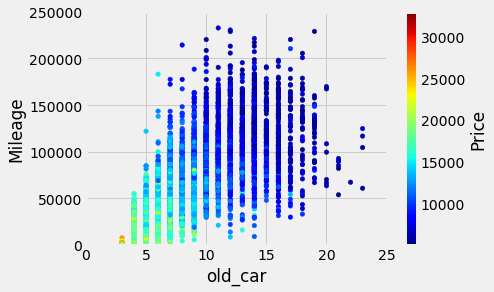

In [183]:
# scatter plot of Years versus Hits colored by Salary
data.plot(kind='scatter', x='old_car', y='Mileage', c='Price', colormap='jet', xlim=(0, 25), ylim=(0, 250000))

In [184]:
data = data.drop(['Model', 'Price','old_car'], axis=1)


In [185]:
y = data['HighPrice']
X = data.drop(['HighPrice'], axis=1)

In [186]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Exercise 8.1

Estimate a Decision Tree Classifier Manually using the code created in the Notebook #13

Evaluate the accuracy on the testing set

### Building a Decision Tree by hand


In [11]:
max_depth = None
num_pct = 10
max_features = None
min_gain=0.001

For feature 1 calculate possible splitting points

In [12]:
j = 1
print(X_train.columns[j])

Mileage


In [13]:
# Split the variable in num_ctp points
splits = np.percentile(X_train.iloc[:, j], np.arange(0, 100, 100.0 / num_pct).tolist())

In [14]:
# Only unique values for filter binary and few unique values features
splits = np.unique(splits)

In [15]:
splits

array([6.000000e+00, 1.603480e+04, 2.324080e+04, 2.987540e+04,
       3.565100e+04, 4.160950e+04, 4.849280e+04, 6.199830e+04,
       8.097420e+04, 1.061537e+05])

split the data using split 5

In [16]:
k = 5
filter_l = X_train.iloc[:, j] < splits[k]

y_l = y_train.loc[filter_l]
y_r = y_train.loc[~filter_l]



The Gini Impurity of a node is the probability that a randomly chosen sample in a node would be incorrectly labeled if it was labeled by the distribution of samples in the node.
For each node

In [17]:
def gini(y):
    if y.shape[0] == 0:
        return 0
    else:
        return 1 - (y.mean()**2 + (1 - y.mean())**2)

In [18]:
gini_l = gini(y_l)
gini_l

0.20474618023837854

In [19]:
gini_r = gini(y_r)
gini_r

0.3959988713681828

### Gini function

In [20]:
def gini_impurity(X_col, y, split):
    "Calculate the gain of an split k on feature j"
    
    filter_l = X_col < split
    y_l = y.loc[filter_l]
    y_r = y.loc[~filter_l]
    
    n_l = y_l.shape[0]
    n_r = y_r.shape[0]
    
    gini_y = gini(y)
    gini_l = gini(y_l)
    gini_r = gini(y_r)
    
    gini_impurity_ = gini_y - (n_l / (n_l + n_r) * gini_l + n_r / (n_l + n_r) * gini_r)
    
    return gini_impurity_

In [21]:
gini_impurity(X_train.iloc[:, j], y_train, splits[k])



0.18743041714283493

### Best splits on all features


In [22]:
def best_split(X, y, num_pct=10):
    
    features = range(X.shape[1])
    
    best_split = [0, 0, 0]  # j, split, gain
    
    # For all features
    for j in features:
        
        splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / (num_pct+1)).tolist())
        splits = np.unique(splits)[1:]
        
        # For all splits
        for split in splits:
            gain = gini_impurity(X.iloc[:, j], y, split)
                        
            if gain > best_split[2]:
                best_split = [j, split, gain]
    
    return best_split

In [23]:
j, split, gain = best_split(X_train, y_train, 10)
j, split, gain

(1, 52187.63636363637, 0.23872134898880762)



#### COMENTARIO: 
En este punto encontramos que el mejor 'Feauture' es 'Mileage', y que el mejor punto para generar las ramas por izquierda y por derecha es, 52187.6363

In [24]:
X_train.columns

Index(['Year', 'Mileage', 'M_Camry', 'M_Camry4dr', 'M_CamryBase', 'M_CamryL',
       'M_CamryLE', 'M_CamrySE', 'M_CamryXLE'],
      dtype='object')



### A continuación dividimos los datos por izquierda y derecha con los parametros sugeridos:

In [25]:
filter_l = X_train.iloc[:, j] < split

y_l = y_train.loc[filter_l]
y_r = y_train.loc[~filter_l]

In [26]:
y.shape[0], y_l.shape[0], y_r.shape[0]

(13150, 5606, 3204)

In [27]:
y.mean(), y_l.mean(), y_r.mean()

(0.5795437262357415, 0.839279343560471, 0.12109862671660425)


#### COMENTARIO: 
En este punto encontramos que por la izquierda tenemos 83.9% de autos con precios altos, y por la derecha tenemos 12.10% de autos con precios altos.

### Recursively grow the tree

In [28]:
def tree_grow(X, y, level=0, min_gain=0.001, max_depth=None, num_pct=10):
    
    # If only one observation
    if X.shape[0] == 1:
        tree = dict(y_pred=y.iloc[:1].values[0], y_prob=0.5, level=level, split=-1, n_samples=1, gain=0)
        return tree
    
    # Calculate the best split
    j, split, gain = best_split(X, y, num_pct)
    
    # save tree and estimate prediction
    y_pred = int(y.mean() >= 0.5) 
    y_prob = (y.sum() + 1.0) / (y.shape[0] + 2.0)  # Laplace correction
    
    tree = dict(y_pred=y_pred, y_prob=y_prob, level=level, split=-1, n_samples=X.shape[0], gain=gain)
    
    # Check stooping criteria
    if gain < min_gain:
        return tree
    if max_depth is not None:
        if level >= max_depth:
            return tree   
    
    # No stooping criteria was meet, then continue to create the partition
    filter_l = X.iloc[:, j] < split
    X_l, y_l = X.loc[filter_l], y.loc[filter_l]
    X_r, y_r = X.loc[~filter_l], y.loc[~filter_l]
    tree['split'] = [j, split]

    # Next iteration to each split
    
    tree['sl'] = tree_grow(X_l, y_l, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    tree['sr'] = tree_grow(X_r, y_r, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    
    return tree

In [29]:
tree_grow(X_train, y_train, level=0, min_gain=0.001, max_depth=1, num_pct=10)



{'y_pred': 1,
 'y_prob': 0.5780753517930095,
 'level': 0,
 'split': [1, 52187.63636363637],
 'n_samples': 8810,
 'gain': 0.23872134898880762,
 'sl': {'y_pred': 1,
  'y_prob': 0.8391583452211127,
  'level': 1,
  'split': -1,
  'n_samples': 5606,
  'gain': 0.03317687167496233},
 'sr': {'y_pred': 0,
  'y_prob': 0.12133499688084841,
  'level': 1,
  'split': -1,
  'n_samples': 3204,
  'gain': 0.04366470703709979}}

In [30]:
tree = tree_grow(X_train, y_train, level=0, min_gain=0.001, max_depth=4, num_pct=10)

tree

{'y_pred': 1,
 'y_prob': 0.5780753517930095,
 'level': 0,
 'split': [1, 52187.63636363637],
 'n_samples': 8810,
 'gain': 0.23872134898880762,
 'sl': {'y_pred': 1,
  'y_prob': 0.8391583452211127,
  'level': 1,
  'split': [0, 2014.0],
  'n_samples': 5606,
  'gain': 0.03317687167496233,
  'sl': {'y_pred': 0,
   'y_prob': 0.36828644501278773,
   'level': 2,
   'split': [0, 2012.0],
   'n_samples': 389,
   'gain': 0.05908490521197157,
   'sl': {'y_pred': 0,
    'y_prob': 0.08,
    'level': 3,
    'split': [2, 1.0],
    'n_samples': 98,
    'gain': 0.01707452211653898,
    'sl': {'y_pred': 0,
     'y_prob': 0.04597701149425287,
     'level': 4,
     'split': -1,
     'n_samples': 85,
     'gain': 0.001980228771650633},
    'sr': {'y_pred': 0,
     'y_prob': 0.3333333333333333,
     'level': 4,
     'split': -1,
     'n_samples': 13,
     'gain': 0.3029585798816569}},
   'sr': {'y_pred': 0,
    'y_prob': 0.46757679180887374,
    'level': 3,
    'split': [1, 40957.63636363636],
    'n_samples'

### Prediction 

In [31]:
def tree_predict(X, tree, proba=False):
    
    predicted = np.ones(X.shape[0])

    # Check if final node
    if tree['split'] == -1:
        if not proba:
            predicted = predicted * tree['y_pred']
        else:
            predicted = predicted * tree['y_prob']
            
    else:
        
        j, split = tree['split']
        filter_l = (X.iloc[:, j] < split)
        X_l = X.loc[filter_l]
        X_r = X.loc[~filter_l]

        if X_l.shape[0] == 0:  # If left node is empty only continue with right
            predicted[~filter_l] = tree_predict(X_r, tree['sr'], proba)
        elif X_r.shape[0] == 0:  # If right node is empty only continue with left
            predicted[filter_l] = tree_predict(X_l, tree['sl'], proba)
        else:
            predicted[filter_l] = tree_predict(X_l, tree['sl'], proba)
            predicted[~filter_l] = tree_predict(X_r, tree['sr'], proba)

    return predicted

In [32]:
p=tree_predict(X_test, tree, proba=False)
p

array([1., 1., 1., ..., 1., 1., 0.])

In [33]:
len(p)

4340

### Accuracy

A continuación validamos el accuracy en test, y tambien validamos el threshold que mejor se ajusta

In [34]:
metrics.accuracy_score(p,y_test)

0.864516129032258

#### COMENTARIO: 
Encontramos un 'accuracy' del 86.45%. A continuación validamos con diferentes threshold:

In [35]:
threshold = 0
accuracy_scores = []

p=tree_predict(X_test, tree, proba=True)
p

for threshold in range(1,101,1):
    y_pred = (p >= threshold/100).astype(np.int)
    accuracy_scores.append(metrics.accuracy_score(y_pred,y_test))    

Text(0, 0.5, 'Accuracy')

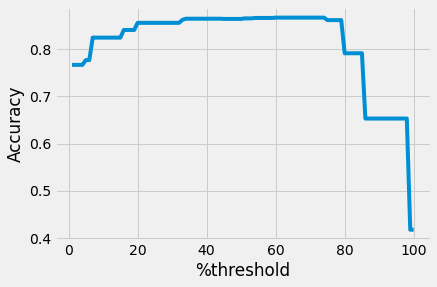

In [36]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# plot max_depth (x-axis) versus RMSE (y-axis)
plt.plot(range(1,101,1), accuracy_scores)
plt.xlabel('%threshold')
plt.ylabel('Accuracy')

### Best Threshold and Accuracy

In [37]:
accuracy_scores.index(max(accuracy_scores)),max(accuracy_scores)

(59, 0.8672811059907835)

#### COMENTARIO: 
El mejor accuracy encontrado fue de 86.72% tomando un threshold del 59%

### Scikit Learn

In [38]:
# list of values to try for max_depth
max_depth_range = range(1, 21)

# list to store the average RMSE for each value of max_depth
accuracy_scores = []

# use 10-fold cross-validation with each value of max_depth
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

for depth in max_depth_range:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    accuracy_scores.append(cross_val_score(clf, X, y, cv=10, scoring='accuracy').mean())

Text(0, 0.5, 'Accuracy')

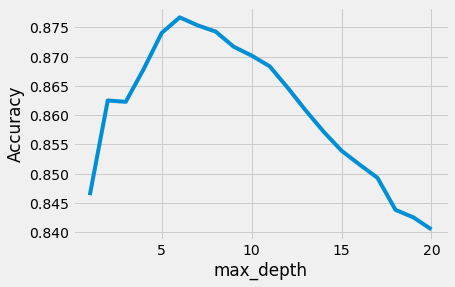

In [39]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# plot max_depth (x-axis) versus RMSE (y-axis)
plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

In [40]:
# show the best accuracy and the corresponding max_depth
sorted(zip(accuracy_scores, max_depth_range))[::-1][0]

(0.8767300380228138, 6)

In [41]:
# max_depth=2 was best, so fit a tree using that parameter
clf = DecisionTreeClassifier(max_depth=6, random_state=1)
clf.fit(X, y)

DecisionTreeClassifier(max_depth=6, random_state=1)

In [42]:
# compute feature importances
feature_cols = X_train.columns
pd.DataFrame({'feature':feature_cols, 'importance':clf.feature_importances_}).sort_values('importance')

,feature,importance
3,M_Camry4dr,0.000000
4,M_CamryBase,0.000000
7,M_CamrySE,0.000007
5,M_CamryL,0.000389
2,M_Camry,0.007466
8,M_CamryXLE,0.009693
6,M_CamryLE,0.017950
0,Year,0.172331
1,Mileage,0.792163


#### COMENTARIO: 
Con sklearn se encuentra que las variables más importantes son 'Mileage', 'Year'.

In [43]:
pd.Series(cross_val_score(clf, X, y, cv=10)).describe()


count    10.000000
mean      0.876730
std       0.010448
min       0.862357
25%       0.868821
50%       0.874905
75%       0.884791
max       0.893536
dtype: float64

# Exercise 8.2

Estimate a Bagging of 10 Decision Tree Classifiers Manually using the code created in the Notebook #7

Evaluate the accuracy on the testing set

In [174]:
#Se crean las muestras aleatorias y los diez árboles de desición

n_estimators = 10
# set a seed for reproducibility
np.random.seed(123)

n_samples = X_train.shape[0]

# create bootstrap samples (will be used to select rows from the DataFrame)
samples = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(n_estimators)]

In [175]:
#modelo
from sklearn.tree import DecisionTreeClassifier

np.random.seed(123) 
seeds = np.random.randint(1, 10000, size=n_estimators)

trees = {}
for i in range(n_estimators):
    trees[i] = DecisionTreeClassifier(max_features="sqrt", max_depth=None, random_state=seeds[i])
    trees[i].fit(X_train.iloc[samples[i]], y_train.iloc[samples[i]])

In [176]:
# Predict 
y_pred_df = pd.DataFrame(index=X_test.index, columns=list(range(n_estimators)))
for i in range(n_estimators):
    y_pred_df.iloc[:, i] = trees[i].predict(X_test)

y_pred_df



,0,1,2,3,4,5,6,7,8,9
332784,0,0,0,0,1,1,0,1,1,1
146436,1,1,1,1,1,1,1,1,1,1
130476,1,1,1,1,1,1,1,1,1,1
85618,1,1,1,1,1,1,1,1,1,1
75474,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
244795,1,1,1,1,1,1,1,1,1,1
366403,1,0,0,0,0,0,0,0,0,0
269482,1,1,1,1,1,1,1,1,1,1
5010,1,1,1,1,1,1,1,1,1,1


In [177]:
y_pred = (y_pred_df.sum(axis=1) >= (n_estimators / 2)).astype(np.int)

from sklearn import metrics
metrics.f1_score(y_pred, y_test)

0.8658823529411764

In [178]:
metrics.accuracy_score(y_pred, y_test)



0.8423963133640553


#### COMENTARIO: 
En el modelo implementado tenemos un accuracy de 84.23% y un f1 score de 86.58%

# Exercise 8.3

Implement the variable max_features on the Decision Tree Classifier created in 11.1.

Compare the impact in the results by varing the parameter max_features

Evaluate the accuracy on the testing set

Text(0, 0.5, 'Accuracy')

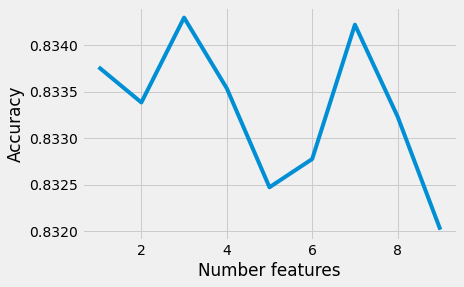

In [51]:
# list of values to try for max_features
feature_range = range(1, len(feature_cols)+1)

# list to store the average Accuracy for each value of max_features
accuracy_scores = []

# use 10-fold cross-validation with each value of max_depth
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

for feature in feature_range:
    clf = DecisionTreeClassifier( random_state=1, max_features=feature)
    accuracy_scores.append(cross_val_score(clf, X, y, cv=10, scoring='accuracy').mean())
  
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# plot max_depth (x-axis) versus RMSE (y-axis)
plt.plot(feature_range, accuracy_scores)
plt.xlabel('Number features')
plt.ylabel('Accuracy')

    

In [52]:
accuracy_scores.index(max(accuracy_scores)),max(accuracy_scores)

(2, 0.8342965779467679)

In [53]:
feature_range[2]

3

#### COMENTARIO:
De esta forma encontramos que con tres features, se encuentra el mejor accuracy de 83.42%. Una vez esto podemos validar la profundidad de los árboles y con los dos parametros max_feature y max_depth, encontrar un mejor modelo.

### Validando profundidad

Text(0, 0.5, 'Accuracy')

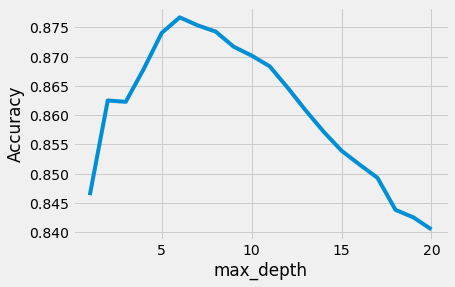

In [54]:
# list of values to try for max_depth
max_depth_range = range(1, 21)

# list to store the average RMSE for each value of max_depth
accuracy_scores = []

# use 10-fold cross-validation with each value of max_depth
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

for depth in max_depth_range:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    accuracy_scores.append(cross_val_score(clf, X, y, cv=10, scoring='accuracy').mean())
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# plot max_depth (x-axis) versus RMSE (y-axis)
plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

In [55]:
accuracy_scores.index(max(accuracy_scores)),max(accuracy_scores)

(5, 0.8767300380228138)

In [56]:
max_depth_range[5]

6

#### COMENTARIO:
Encontramos que la mejor profundidad es de 6. Ahora volvemos a encontrar el mejor max_feature con profundidad de 6 para los árboles

Text(0, 0.5, 'Accuracy')

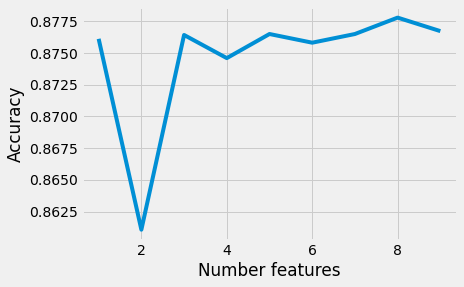

In [57]:
# list of values to try for max_features
feature_range = range(1, len(feature_cols)+1)

# list to store the average Accuracy for each value of max_features
accuracy_scores = []

# use 10-fold cross-validation with each value of max_depth
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

for feature in feature_range:
    clf = DecisionTreeClassifier( max_depth=6, random_state=1, max_features=feature)
    accuracy_scores.append(cross_val_score(clf, X, y, cv=10, scoring='accuracy').mean())
  
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# plot max_depth (x-axis) versus RMSE (y-axis)
plt.plot(feature_range, accuracy_scores)
plt.xlabel('Number features')
plt.ylabel('Accuracy')

    

In [58]:
accuracy_scores.index(max(accuracy_scores)),max(accuracy_scores)

(7, 0.8777946768060836)

In [59]:
feature_range[7]

8

In [60]:
acc_DTF=max(accuracy_scores)
print(acc_DTF)

0.8777946768060836



#### COMENTARIO:
Finalmente, encontramos que con ocho features, se encuentra el mejor accuracy de 87.7%.

# Exercise 8.4

Estimate a Bagging of 10 Decision Tree Classifiers with `max_features = log(n_features)`

Evaluate the accuracy on the testing set

In [61]:
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier( max_features="log2"), n_estimators=10, bootstrap=True,
                        random_state=123, n_jobs=-1, oob_score=True)

In [62]:
clf.fit(X_train, y_train)
p = clf.predict(X_test)
auc_DT=metrics.accuracy_score(p,y_test)
print(auc_DT)

0.8352534562211982


#### COMENTARIO:
Con el parametro 'log' encontramos un accuracy de 83.52%. De igual forma validamos como se comporta el accuracy variando el threshold con este modelo:

In [63]:

p = clf.predict_proba(X_test)
p = p[:,1]

In [64]:
p

array([0.2, 1. , 1. , ..., 1. , 1. , 0.1])

In [65]:
threshold = 0
accuracy_scores = []

for threshold in range(1,101,1):
    y_pred = (p >= threshold/100).astype(np.int)
    accuracy_scores.append(metrics.accuracy_score(y_test, y_pred))    

Text(0, 0.5, 'Accuracy')

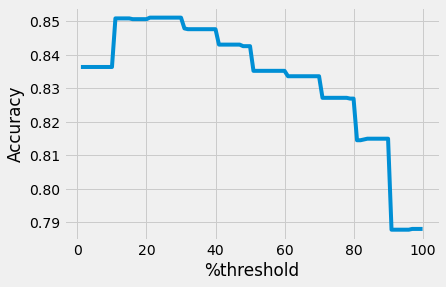

In [66]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# plot max_depth (x-axis) versus RMSE (y-axis)
plt.plot(range(1,101,1), accuracy_scores)
plt.xlabel('%threshold')
plt.ylabel('Accuracy')

In [67]:
accuracy_scores.index(max(accuracy_scores)),max(accuracy_scores)

(20, 0.8511520737327188)

In [68]:
acc_bag10=max(accuracy_scores)
print(acc_bag10)

0.8511520737327188


#### COMENTARIO:
Al utilizar un threshold del 20%, se máximiza el accuracy al 85.11%

# Exercise 8.5

Using sklearn, train a RandomForestClassifier

Evaluate the accuracy on the testing set

In [187]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

clf_rf = RandomForestClassifier()
clf_rf

RandomForestClassifier()

In [188]:
pd.Series(cross_val_score(clf_rf, X, y, cv=10)).describe()

count    10.000000
mean      0.836046
std       0.011172
min       0.821293
25%       0.830989
50%       0.833840
75%       0.840875
max       0.858555
dtype: float64

In [189]:
from sklearn import metrics
clf_rf.fit(X_train, y_train)
y_pred = clf_rf.predict(X_test)
acc_RF=metrics.accuracy_score(y_pred, y_test.values)
print(acc_RF)

0.8377880184331797


#### COMENTARIO:
El accuracy del modelo RandomForestClassifier usando sklearn es de 83,80%

# Exercise 8.6

Find the best parameters of the RandomForestClassifier (max_depth, max_features, n_estimators)

Evaluate the accuracy on the testing set

## - n_estimators

In [190]:
estimator_range = range(1, 30, 5)
accuracy_scores = []

# Se usan 10-fold para el cross-validation en el rango de estimación de 1 a 10 n_estimators
for estimator in estimator_range:
    clf_rf = RandomForestClassifier(n_estimators=estimator, random_state=1, n_jobs=-1)
    accuracy_scores.append(cross_val_score(clf_rf, X_train, y_train, cv=10, scoring='accuracy').mean())

Text(0, 0.5, 'Accuracy')

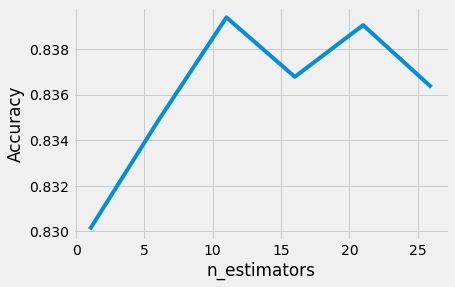

In [191]:
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.plot(estimator_range, accuracy_scores)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')

In [192]:
estimator_range[accuracy_scores.index(max(accuracy_scores))],max(accuracy_scores)

(11, 0.8393870601589104)

#### COMENTARIO:
El mejor accuracy se logra con 11 estimadores, este accuracy corresponde a 83.94%.

## - max_features

Se busca encontrar el número óptimo de features teniendo en cuenta el parámetro de estimadores óptimos encontrados en el punto anterior (11 estimadores)

In [193]:
feature_cols = X_train.columns
feature_range = range(1, len(feature_cols)+1)

accuracy_scores = []

# Se usan 10-fold para el cross-validation en el rango columnas de features
for feature in feature_range:
    clf_rf = RandomForestClassifier(n_estimators=11, max_features=feature, random_state=1, n_jobs=-1)
    accuracy_scores.append(cross_val_score(clf_rf, X_train, y_train, cv=10, scoring='accuracy').mean())

Text(0, 0.5, 'Accuracy')

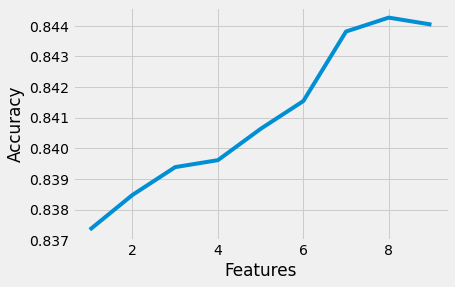

In [194]:
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.plot(feature_range, accuracy_scores)
plt.xlabel('Features')
plt.ylabel('Accuracy')

In [195]:
feature_range[accuracy_scores.index(max(accuracy_scores))],max(accuracy_scores)

(8, 0.8442678774120317)

#### COMENTARIO:
El mejor accuracy se logra con 8 features, con un desempeño del 84.42%.

## - max_depth

Se busca encontrar la máxima profundidad de los árboles a predecir, teniendo en cuenta los parámetros óptimos encontrados de estimadores y features

In [196]:
max_depth_range = range(1, 21)
accuracy_scores = []

# use 10-fold cross-validation with each value of max_depth

for depth in max_depth_range:
    clf = RandomForestClassifier(max_depth=depth, max_features= 8, n_estimators= 11, random_state=1, n_jobs=-1)
    accuracy_scores.append(cross_val_score(clf, X, y, cv=10, scoring='accuracy').mean())

Text(0, 0.5, 'Accuracy')

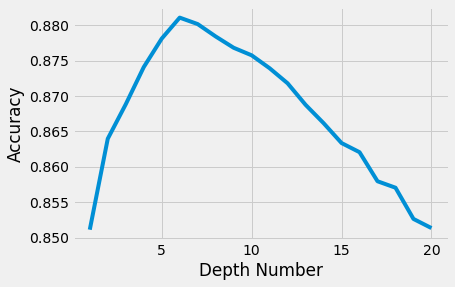

In [197]:
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('Depth Number')
plt.ylabel('Accuracy')

In [198]:
max_depth_range[accuracy_scores.index(max(accuracy_scores))],max(accuracy_scores)

(6, 0.8810646387832701)

#### COMENTARIO:
El mejor accuracy se logra con depth = 6, este accuracy corresponde a 88.10%.

## - Modelo de Random Forest ajustado a los mejores parámetros

In [199]:
# max_features= 8, n_estimators= 11 & max_depth=6
clf = RandomForestClassifier(max_depth=6, n_estimators=11, max_features=8, random_state=1, n_jobs=-1)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, max_features=8, n_estimators=11, n_jobs=-1,
                       random_state=1)

In [200]:
y_pred = clf.predict(X_test)
acc_RFC= metrics.accuracy_score(y_pred, y_test.values)
print(acc_RFC)

0.8806451612903226


#### COMENTARIO:
Una vez se han ajustado los parámetros calibrados max_features, n_estimators y max_depth el modelo ensamblado y calibrado obtiene un accuracy aumenta al 88,06%. En comparación con los modelos de Random Forest sin calibración, éste es el que posee el mejor performance.   

# Exercise 8.7 

Using xgboost train a XGBClassifier 

Evaluate the accuracy on the testing set

In [84]:
from xgboost import XGBClassifier
clf = XGBClassifier()
clf

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)

In [85]:
from sklearn import metrics
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

[13:26:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [86]:
#Accuracy
acc_XGB= metrics.accuracy_score(y_pred, y_test.values)
print(acc_XGB)

0.8790322580645161


#### COMENTARIO:
Se encuentra un accuracy del 87.9%, para el XGBoost sin calibrar

# Exercise 8.8

Using xgboost train a XGBClassifier 

Modify the parameters learning rate, gamma, colsample_bytree. Explain what each parameter means.

Evaluate the accuracy on the testing set

* Learning_rate: Se utiliza para evitar el over-fitting, Después de cada boosting,se reducen los pesos de las nuevas funciones para que el proceso sea más conservador.
* Gamma: Es la reducción de pérdida mínima requerida para hacer una partición adicional en un nodo hoja del árbol. Cuanto mayor sea gamma, más conservador será el algoritmo.
* Colsample_bytree: es la proporción de submuestra de columnas al construir cada árbol. El submuestreo ocurre una vez por cada árbol construido.

In [87]:
# Se establece la grilla de parámetros a calibrar
params = {
        'learning_rate': [0.08,0.09, 0.1, 0.11,0.12,0.13,0.14,0.2,0.3],
        'gamma': [0.5,0.7,0.8,0.9,1,1.1,1,2,1,3, 1.5, 2, 5,7,9,15],
        'colsample_bytree': [0.75, 0.8,0.85,0.9, 1.0],
        }

In [88]:
xgb = XGBClassifier(objective='binary:logistic',
                    silent=True, nthread=1)

In [89]:
# Se incluye función de timer para saber cuánto se esta demorando la ejecución
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [90]:
# Aquí se configuran los parámetros establecidos para la búsqueda de grilla, y se usa el auc como medida para determinar el rendimeinto de cada iteración

from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
param_comb = 7


folds=10
skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='accuracy', n_jobs=10, cv=skf.split(X_train,y_train), verbose=3, random_state=1001 )

#Timer y random search
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_train, y_train)
timer(start_time) # timing ends here for "start_time" variable

Fitting 10 folds for each of 7 candidates, totalling 70 fits
[13:26:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:26:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 0 minutes and 13.35 seconds.


In [91]:
#Impresión de resultados

print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
#results.to_csv('xgb-random-grid-search-results-01.csv', index=False)
print(results)


 All results:
{'mean_fit_time': array([1.27667096, 1.27613912, 1.28597612, 1.50751305, 1.64434617,
       1.67729142, 1.39787996]), 'std_fit_time': array([0.16849158, 0.13250382, 0.07532437, 0.14157084, 0.16376145,
       0.16418665, 0.14924204]), 'mean_score_time': array([0.00967662, 0.00588109, 0.00701573, 0.01146715, 0.00866196,
       0.00818095, 0.00751672]), 'std_score_time': array([0.00185149, 0.0006438 , 0.00040452, 0.0050201 , 0.00262412,
       0.00052276, 0.00143264]), 'param_learning_rate': masked_array(data=[0.08, 0.2, 0.12, 0.1, 0.08, 0.08, 0.13],
             mask=[False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[1.1, 15, 1.5, 3, 9, 0.9, 0.5],
             mask=[False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_colsample_bytree': masked_array(data=[0.8, 0.8, 0.9, 0.8, 0.8, 1.0, 0.9],
             mask=[False, False, False, False, 

Se ejecuta el modelo con los parámetros calibrados

In [92]:
#xgb2 = XGBClassifier(learning_rate=0.14,gamma=5,colsamble_bytree=0.85)
xgb2 = XGBClassifier(learning_rate=0.12,gamma=1.5,colsamble_bytree=0.9)

In [93]:
xgb2.fit(X_train, y_train)
y_pred = xgb2.predict(X_test)
acc_XGBC= metrics.accuracy_score(y_pred, y_test.values)
print(acc_XGBC)

[13:26:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "colsamble_bytree" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:26:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8829493087557604


#### COMENTARIO:
El accuracy del modelo calibrado es de 88.29% siendo mejor que el del modelo sin calibrar que cuenta con un accuracy de 87.9%

## Comparación de modelos

In [96]:
# Comparación de Accuracy
from tabulate import tabulate
table = [['Modelo', 'Accuracy'],['Bagging Decision Tree by hand', acc_bag10],['Bagging Decision Tree by hand Calibrado', acc_DTF],['Random Forest Sktlearn', acc_RF], ['Random Forest Calibrado', acc_RFC],['XGBoost Sktlearn', acc_XGB],['XgBoost Calibrado', acc_XGBC]]
print(tabulate(table))

---------------------------------------  ------------------
Modelo                                   Accuracy
Bagging Decision Tree by hand            0.8511520737327188
Bagging Decision Tree by hand Calibrado  0.8777946768060836
Random Forest Sktlearn                   0.8382488479262673
Random Forest Calibrado                  0.8806451612903226
XGBoost Sktlearn                         0.8790322580645161
XgBoost Calibrado                        0.8829493087557604
---------------------------------------  ------------------


## Conclusión

* De acuerdo con la tabla anterior, se puede observar, que el modelo que obtuvo mejor desempeño con la métrica de Accuracy es el XGBoost calibrado con los parámetros learning_rate, gamma y colsample_bytree, logrando un accuracy de 88.3%
* Para todos los casos, se observa que los modelos después de la calibración de parámetros obtienen un mejor desempeño.